# Seaborn - Distribution Plots

Los objetivos de aprendizaje son:

1. ¿Qué es Seaborn?
2. Distribution Plots
    - Datos
    - `sns.histplot()`
    - `sns.joinplot()`
    - `sns.pairplot()`

## ¿Qué es Seaborn?

[Seaborn](https://seaborn.pydata.org/) es una librería de visualización de datos construida sobre `Matplotlib`. Seaborn nos brinda una interfaz de alto nivel (poco código) para realizar gráficos estadísticos. 

El código fuente se encuentra en [github](https://github.com/mwaskom/seaborn).



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


## Distribution Plots

Esta clase de gráfico se utiliza sobre variables del tipo numérico, y son una buena alternativa para mostrar la [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) de un conjunto de observaciones.


### Datos

Seaborn cuenta con datos precargados, en formato Pandas `DataFrame`.

Para estos ejemplos usaremos el `DataFrame` `tips`, que contiene información de las propinas que han dejado comensales en un restaurante. Sus columnas son:

* `total_bill`: monto total de la comida.
* `tip`: monto de la propina.
* `sex`: Género de la persona que ha realizado de reserva.
* `smoker`: Indica si la reserva fue realizada en el área de fumadores.
* `day`: Día de la semana.
* `time`: Horario de la comida. 
* `size`: Número de comensales.

In [2]:
tips = sns.load_dataset('tips')
print("La Clase de tips es: {}".format(type(tips)))
tips.head()

La Clase de tips es: <class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### `sns.histplot()`

La función [`sns.histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) se usa para grafica el histograma y [*Kernel density estimation*](https://en.wikipedia.org/wiki/Kernel_density_estimation) de los datos que se pasan como inputs.

Regresa una instancia de la clase [`matplotlib.Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes).

Los parámetros mínimos son:

* `data`: DataFrame que contiene los datos a graficar.
* `x`: Variable numérica dentro del DataFrame que graficaremos

Algunos de los parámetro opcionales/con valores por defecto son:

* `kde`: Mostrar o no el Kernel density estimation
* `bins`: Número de barras del histográma.

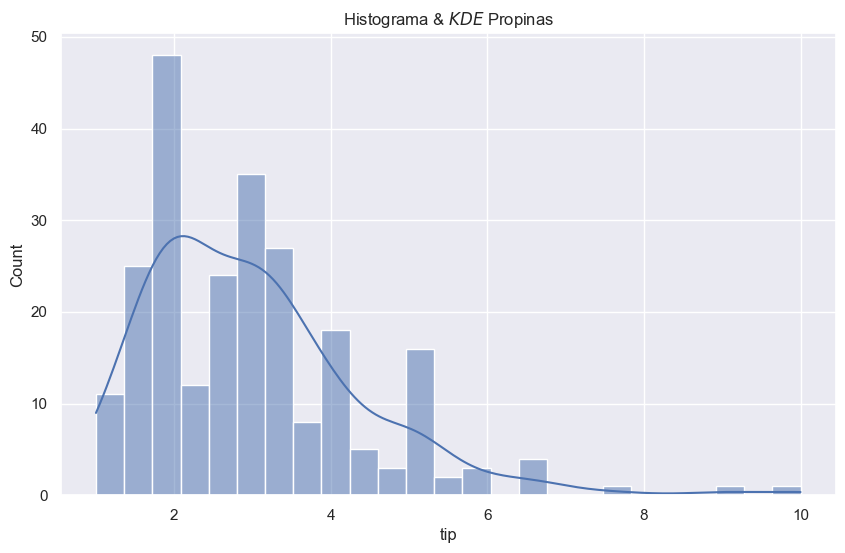

In [3]:
plt.figure(figsize=(10, 6))
plot = sns.histplot(data = tips, x = 'tip', kde = True, bins = 25)
plot.set_title("Histograma & $KDE$ Propinas")
plt.show()

###  `sns.joinplot()`

La función [`sns.joinplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) genera un gráfico que empareja dos variables numéricas.

Los parámetros mínimos son:

* `data`: Los datos que utilizaremos para generar el gráfico
* `x`/`y`: la variable numérica que irá en el eje x/y

Algunos de los parámetro opcionales/con valores por defecto son:

* `kind`: { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }, genera distintos tipos de visualizaciones  
* `hue`: genera matices de colores mediante el uso de una variable categórica. 

Regresa un objeto de la clase [`seaborn.JointGrid`](http://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid), lo importante para personalizar el gráfico, es que esta clase es que tiene los siguientes atributos:

* `fig`: Una instancia de la clase `matplotlib.figure.Figure`
* `ax_joint`: Gráfico del centro es una instancia de la clase [`matplotlib.AxesSubplot`](https://matplotlib.org/3.3.3/api/axes_api.html)
* `ax_marg_x`: Gráfico del margen $x$, es una instancia de la clase [`matplotlib.AxesSubplot`](https://matplotlib.org/3.3.3/api/axes_api.html)
* `ax_marg_y`: Gráfico del margen $y$, es una instancia de la clase [`matplotlib.AxesSubplot`](https://matplotlib.org/3.3.3/api/axes_api.html)


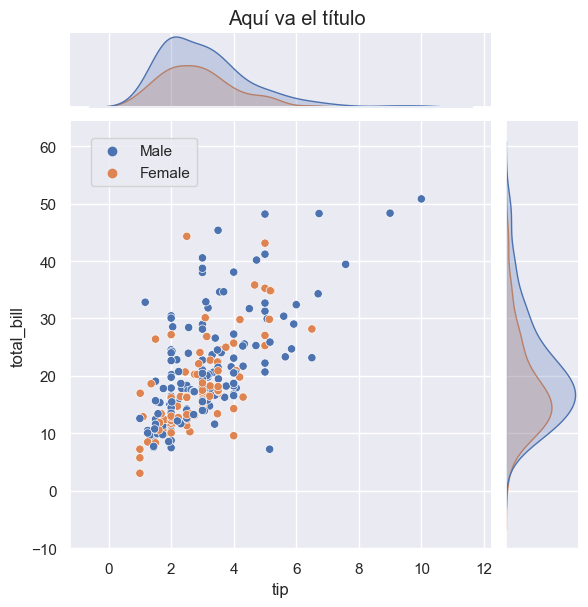

In [4]:
plot = sns.jointplot(
    data = tips,
    x = 'tip',
    y = "total_bill",
    kind = "scatter",
    height  = 6,
    hue = "sex"
)
plot.fig.suptitle(t = "Aquí va el título", x = 0.5, y = 1.01)
plot.ax_joint.legend(loc = (0.05,.85))
plt.show()

### `sns.pairplot()`

La función [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) genera un gráfico que muestra la relación de las variables numéricas por pares. 

Los parámetros mínimos son:

* `data`: Los datos que utilizaremos para generar el gráfico

Algunos de los parámetro opcionales/con valores por defecto son:

* `hue`: genera matices de colores mediante el uso de una variable categórica.
* `diag_kind`: Tipo de gráfico unitario 
* `corner`: Mostrar sólo la diagonal inferior 

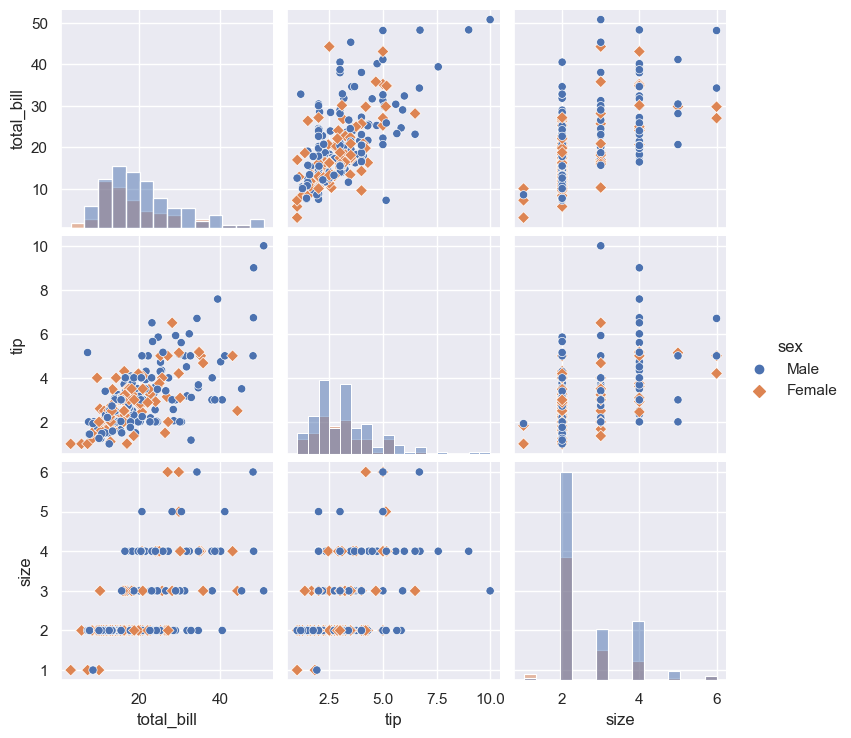

In [6]:
plot = sns.pairplot(data = tips, hue = "sex", diag_kind = "hist", markers = ["o","D"])
plt.show()

La función `sns.pairplot()` regresa un objeto de la clase [`seaborn.PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html#seaborn.PairGrid).

Podemos personalizar los gráficos de la diagonal:

1. llamar al método método [`PairGrid.map_lower()`](https://seaborn.pydata.org/generated/seaborn.PairGrid.map_lower.html) que nos ayuda a aplicar una función sobre la diagonal inferior del gráfico.

2. usar la función [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) que estima la [Función de densidad de probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) de una forma no paramétrica.

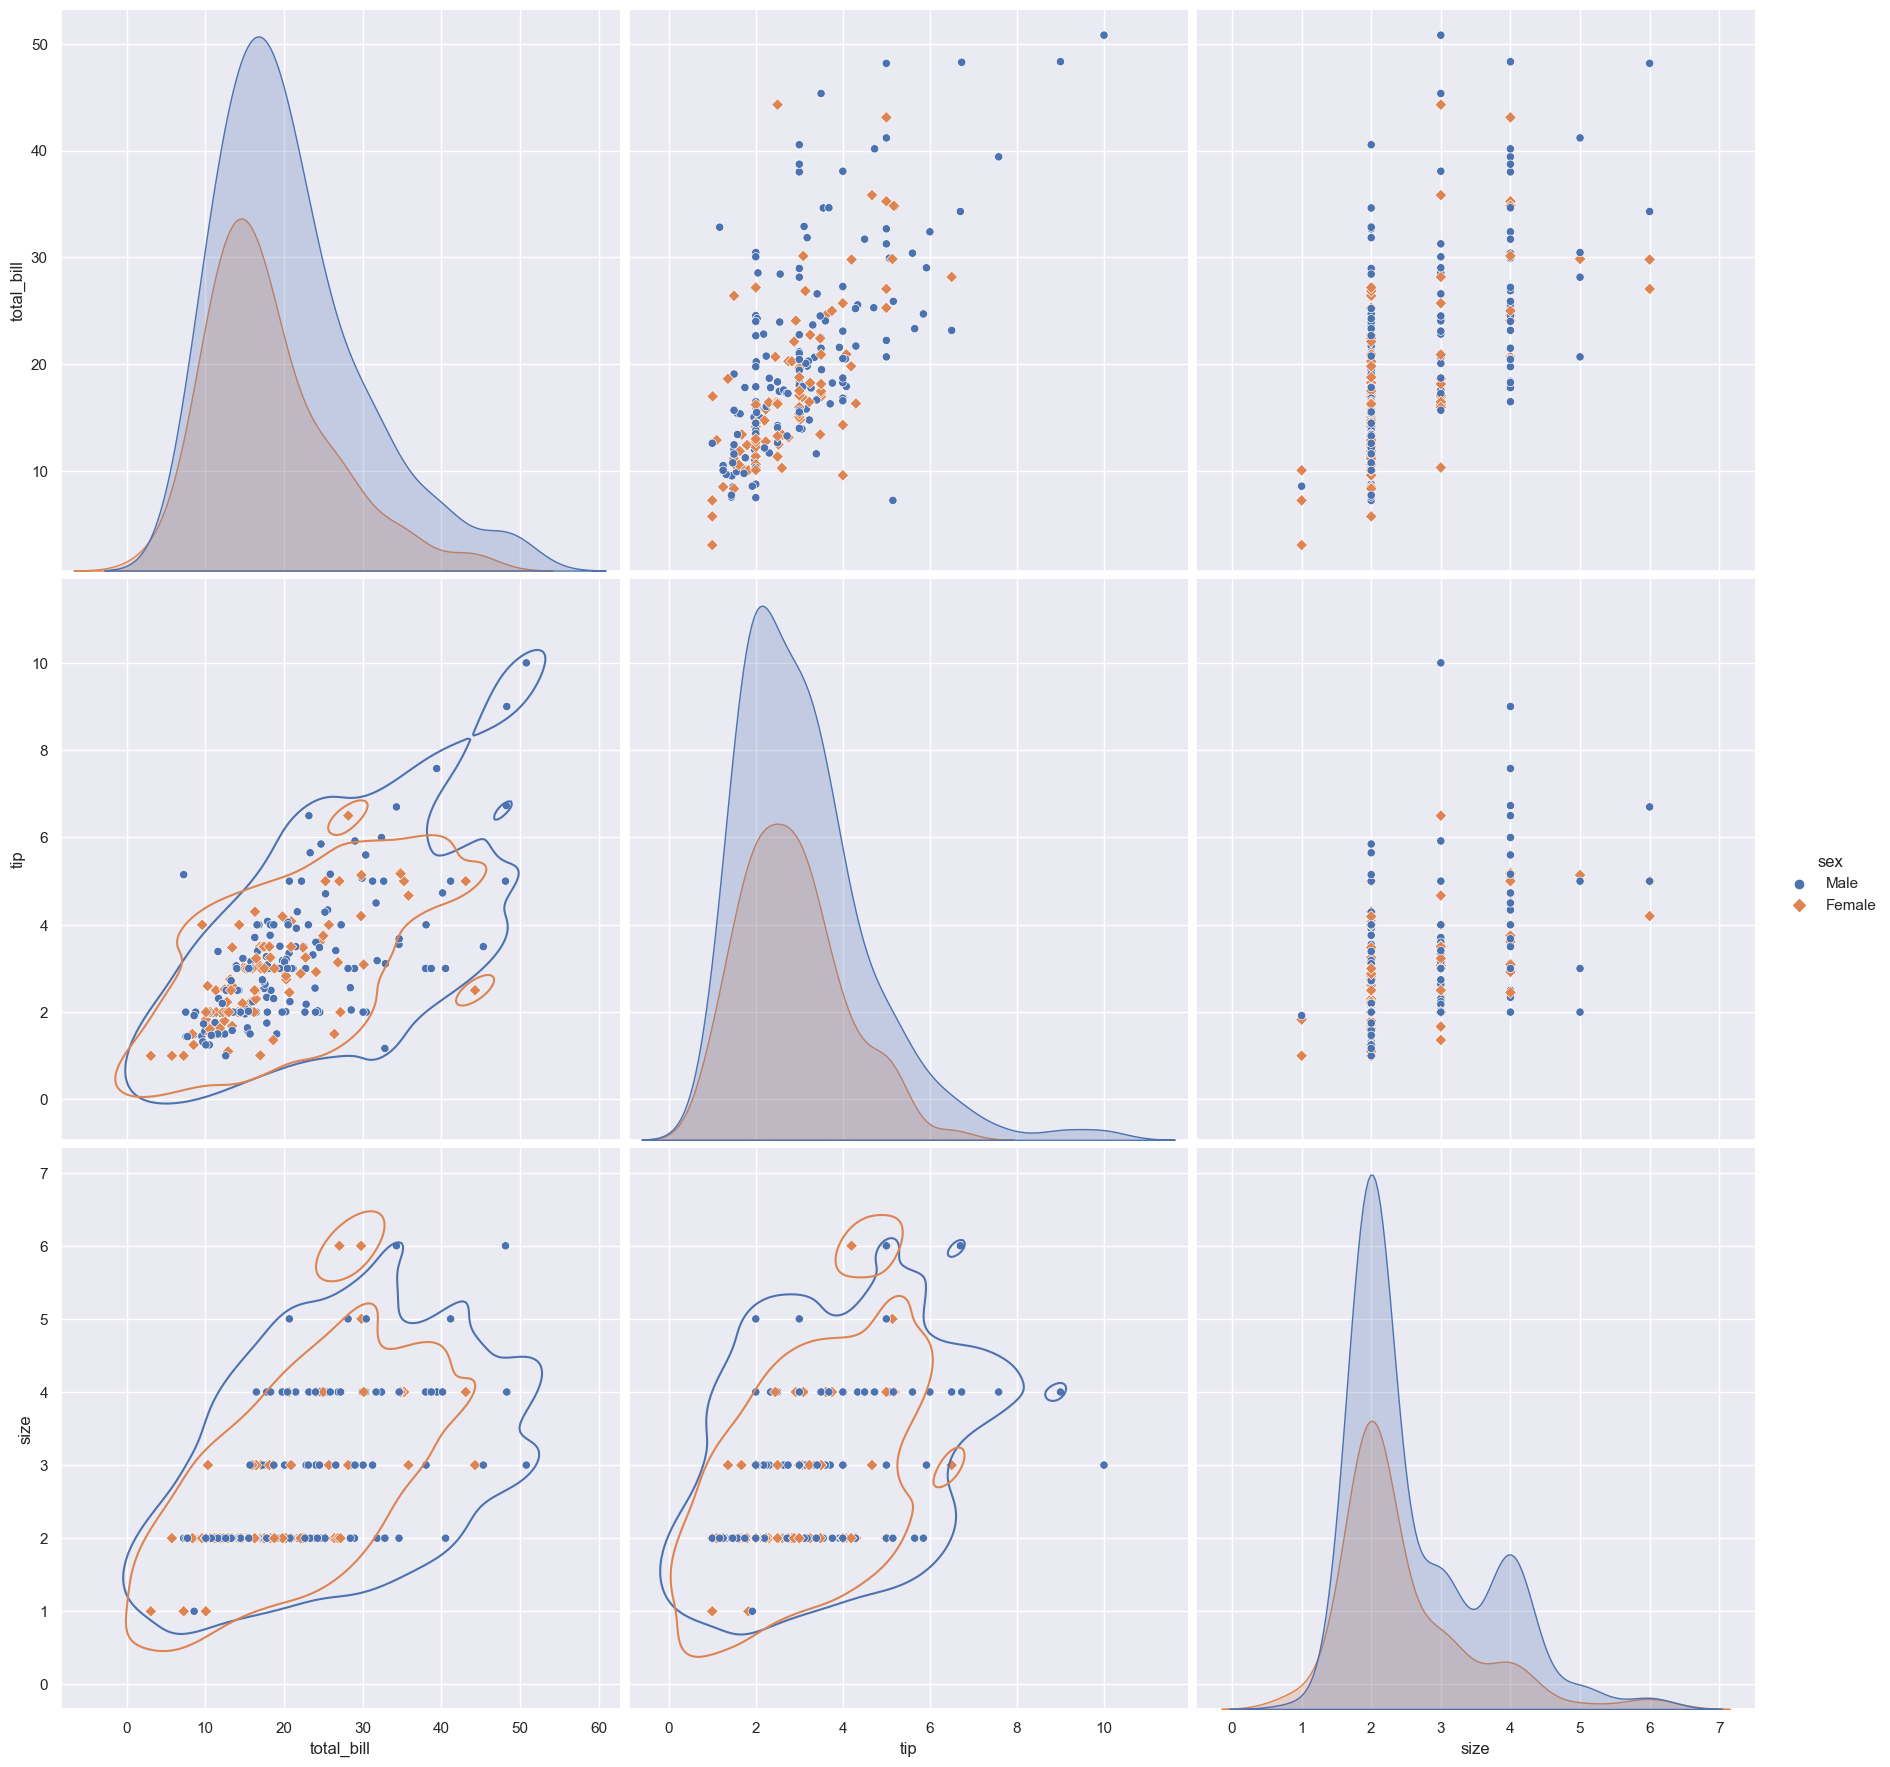

In [7]:
plot = sns.pairplot(data = tips, hue = "sex", diag_kind = "kde", markers = ["o","D"], height = 6)
plot.map_lower(sns.kdeplot, levels = 2)
plt.show()

## Visualización Teorema del Límite Central

El [Teorema del Límite Central](https://es.wikipedia.org/wiki/Teorema_del_l%C3%ADmite_central) es la base de los supuestos de muchos algoritmos de *machine learning* (e.g. Regresión Lineal, GBs, DNN, etc.).

si $S_n$ es la suma de $n$ variables aleatorias independientes, e identicamente distribuidas con media y varianza finitas, entonces la función de distribución de $S_n$ se aproxima a una distribución normal. 

Veamos si se cumple:

In [8]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
sns.histplot(data = tips, x = "total_bill")
plt.show()

La distribución no parece normal, se parece más a una distribución [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution#:~:text=In%20probability%20theory%20and%20statistics,time%20since%20the%20last%20event.).

Pero, si calculamos la media de la variable por el tamaño de la mesa y calculamos una media ponderada

In [ ]:
tips_agg = tips.groupby(
    by='size'
).agg(
    total_bill = ("total_bill","mean"),
    n = ("total_bill", "count")
)
display(tips_agg.head(3))

In [ ]:
sns.kdeplot(data=tips_agg, x="total_bill", weights="n")
plt.show()